In [4]:
import numpy as np
from tqdm import tqdm_notebook as tqdm
from matplotlib import pyplot as plt
import matplotlib as mpl

import seaborn as sns

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

mpl.rc('font', **font)

In [2]:
def frate(ge, gi, vl=-80, ve=0, vi=-60, vt=-60, vr=-70, tr=0, tm= 0.02):
    
    # calculating firing rate of an LIF model in units of Hz
    # ge: glu conductance relative to leak conductance (unitless)
    # gi: gaba conductance relative to leak conductance (unitless)
    # vl: leak reversal (mV)
    # ve: glu reversal (mV)
    # vi: gaba reversal (mV)
    # vt: spike treshold (mV)
    # vr: reset potential (mV)
    # tr: refractory period (s)
    # tm: membrane time constant (s)
    
    v_eff = (vl + ge*ve + gi*vi)/(1+ge+gi)
    if v_eff>vt:
        
        tau = tm * np.log((v_eff-vr)/(v_eff-vt)) / (1+ge+gi) + tr
        firing_rate = 1/tau
        
    else:
        
        firing_rate = 0
    
    return(firing_rate)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


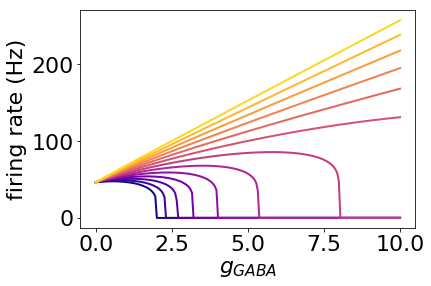

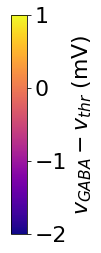

In [13]:
fig = plt.figure()


cmap = mpl.cm.get_cmap('plasma')
vi_list = np.linspace(-62, -59, 13) 
color_list = [cmap(i/len(vi_list)) for i in range(len(vi_list))]

for ind1,vi in enumerate(vi_list):
    
    gi_list = np.linspace(0,10,200)
    firing_rate = np.zeros(len(gi_list))

    for ind2,gi in enumerate(gi_list):
        firing_rate[ind2] = frate(ge=.4, gi=gi, vi=vi)
        
    plt.plot(gi_list, firing_rate, label=str(vi-(-60)), color=color_list[ind1], linewidth=2)
    
plt.ylabel(r'firing rate (Hz)')
plt.xlabel(r'$g_{GABA}$');

plt.savefig('f_vs_gaba.svg')

fig, ax = plt.subplots(figsize=(0.3, 8))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.plasma
norm = mpl.colors.Normalize(vmin=vi_list[0]+60, vmax=vi_list[-1]+60)

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='vertical')
cb1.set_label(r'$v_{GABA}-v_{thr}$ (mV)')
fig.show()
plt.savefig('f_vs_gaba_colorbar.svg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


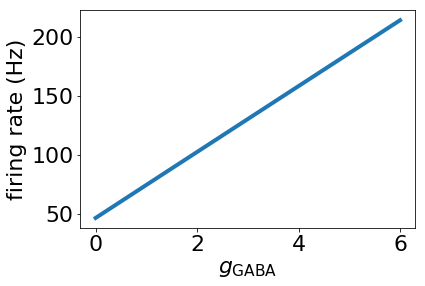

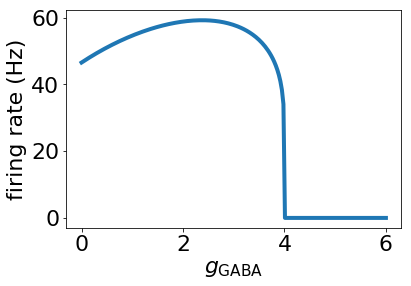

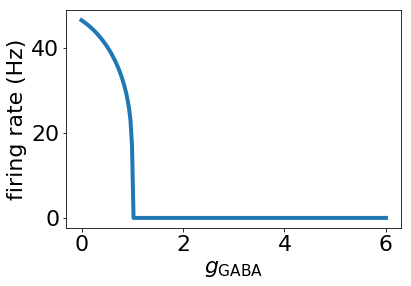

In [15]:
# examples
gi_list = np.linspace(0,6,200)
firing_rate = np.zeros(len(gi_list))

vi = -58
for ind2,gi in enumerate(gi_list):
    
    firing_rate[ind2] = frate(ge=.4, gi=gi, vi=vi)

fig = plt.figure()
plt.plot(gi_list, firing_rate, label=str(vi-(-60)), linewidth=4)
    
plt.ylabel(r'firing rate (Hz)')
plt.xlabel(r'$g_{\rm GABA}$');
plt.savefig('f_vs_gaba_vi-58.svg')

vi = -61
for ind2,gi in enumerate(gi_list):
    
    firing_rate[ind2] = frate(ge=.4, gi=gi, vi=vi)

fig = plt.figure()
plt.plot(gi_list, firing_rate, label=str(vi-(-60)), linewidth=4)
    
plt.ylabel(r'firing rate (Hz)')
plt.xlabel(r'$g_{\rm GABA}$');
plt.savefig('f_vs_gaba_vi-61.svg')

vi = -64
for ind2,gi in enumerate(gi_list):
    
    firing_rate[ind2] = frate(ge=.4, gi=gi, vi=vi)

fig = plt.figure()
plt.plot(gi_list, firing_rate, label=str(vi-(-60)), linewidth=4)
    
plt.ylabel(r'firing rate (Hz)')
plt.xlabel(r'$g_{\rm GABA}$');
plt.savefig('f_vs_gaba_vi-64.svg')


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


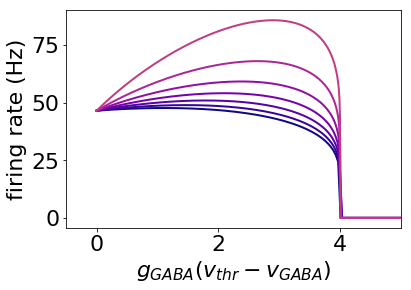

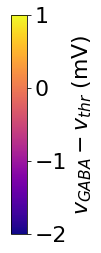

In [20]:
fig = plt.figure()


cmap = mpl.cm.get_cmap('plasma')
vi_list_0 = np.linspace(-62, -59, 13) 
color_list = [cmap(i/len(vi_list_0)) for i in range(len(vi_list_0))]

vi_list = np.linspace(-62, -60.5, 7) 

for ind1,vi in enumerate(vi_list):
    
    gi_list = np.linspace(0,10,500)
    firing_rate = np.zeros(len(gi_list))

    for ind2,gi in enumerate(gi_list):
        firing_rate[ind2] = frate(ge=.4, gi=gi, vi=vi)
        
    plt.plot(gi_list*(-60-vi), firing_rate, label=str(vi-(-60)), color=color_list[ind1], linewidth=2)
    
plt.ylabel(r'firing rate (Hz)')
plt.xlabel(r'$g_{GABA}(v_{thr}-v_{GABA})$');
plt.xlim([-0.5,5])

plt.savefig('f_vs_gaba_collapsed.svg')

fig, ax = plt.subplots(figsize=(0.3, 8))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.plasma
norm = mpl.colors.Normalize(vmin=vi_list_0[0]+60, vmax=vi_list_0[-1]+60)

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='vertical')
cb1.set_label(r'$v_{GABA}-v_{thr}$ (mV)')
fig.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


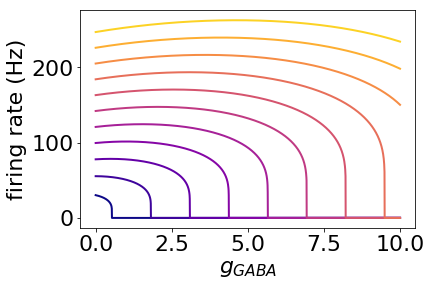

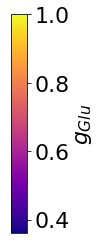

In [15]:
fig = plt.figure()


cmap = mpl.cm.get_cmap('plasma')
ge_list = np.linspace(.36, 1, 11) 
color_list = [cmap(i/len(ge_list)) for i in range(len(ge_list))]

for ind1,ge in enumerate(ge_list):
    
    gi_list = np.linspace(0,10,2000)
    firing_rate = np.zeros(len(gi_list))

    for ind2,gi in enumerate(gi_list):
        firing_rate[ind2] = frate(ge=ge, gi=gi, vi=-63)
        
    plt.plot(gi_list, firing_rate, label=str(ge), color=color_list[ind1], linewidth=2)
    
plt.ylabel(r'firing rate (Hz)')
plt.xlabel(r'$g_{GABA}$');

plt.savefig('f_vs_gaba_ge.svg')

fig, ax = plt.subplots(figsize=(0.3, 8))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.plasma
norm = mpl.colors.Normalize(vmin=ge_list[0], vmax=ge_list[-1])

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='vertical')
cb1.set_label(r'$g_{Glu}$')
fig.show()
plt.savefig('f_vs_gaba_ge_colorbar.svg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


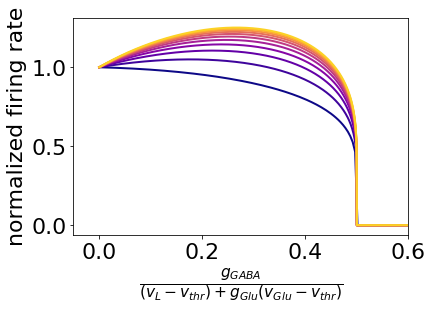

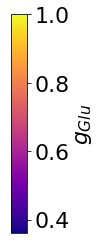

In [17]:
fig = plt.figure()


cmap = mpl.cm.get_cmap('plasma')
ge_list = np.linspace(.36, 1, 11) 
color_list = [cmap(i/len(ge_list)) for i in range(len(ge_list))]

for ind1,ge in enumerate(ge_list):
    
    gi_list = np.linspace(0,30,4001)
    firing_rate = np.zeros(len(gi_list))

    for ind2,gi in enumerate(gi_list):
        firing_rate[ind2] = frate(ge=ge, gi=gi, vi=-62)
        
    plt.plot(gi_list/(-20+ge*(60)), firing_rate/firing_rate[0], label=str(ge), color=color_list[ind1], linewidth=2)
    
plt.ylabel(r'normalized firing rate')
plt.xlabel(r'$\frac{g_{GABA}}{(v_L-v_{thr})+g_{Glu}(v_{Glu}-v_{thr})}$');
plt.xlim([-0.05,0.6])

plt.savefig('f_vs_gaba_ge_collapsed.svg')

fig, ax = plt.subplots(figsize=(0.3, 8))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.plasma
norm = mpl.colors.Normalize(vmin=ge_list[0], vmax=ge_list[-1])

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='vertical')
cb1.set_label(r'$g_{Glu}$')
fig.show()
plt.savefig('f_vs_gaba_ge_colorbar_2.svg')

In [18]:
gi_list = np.linspace(0,10,201)
ge_list = np.linspace(0,1,201)

firing_rate = np.zeros((len(ge_list), len(gi_list)))

for ind1, ge in enumerate(ge_list):
    
    for ind2, gi in enumerate(gi_list):
        
        firing_rate[ind1, ind2] = frate(ge=ge, gi=gi, vi=-62)
        

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


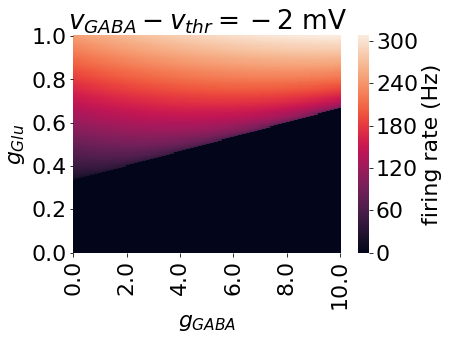

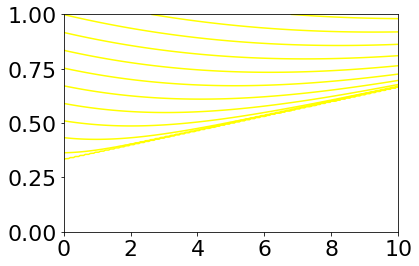

In [19]:
fig = plt.figure()


num_ticks = 6
yticks = np.linspace(0, len(ge_list) - 1, num_ticks, dtype=np.int)
yticklabels = np.array([ge_list[idx] for idx in yticks])
num_ticks = 6
xticks = np.linspace(0, len(gi_list) - 1, num_ticks, dtype=np.int)
xticklabels = np.array([gi_list[idx] for idx in xticks])


ax = sns.heatmap(firing_rate, 
                 xticklabels=np.round(xticklabels, decimals=1), 
                 yticklabels=np.round(yticklabels, decimals=1), 
                 cbar_kws={'label': r'firing rate (Hz)'});
ax.invert_yaxis();
ax.set_yticks(yticks)
ax.set_xticks(xticks)

plt.xlabel(r'$g_{GABA}$');
plt.ylabel(r'$g_{Glu}$');
plt.title(r'$v_{GABA}-v_{thr}=-2$ mV')

plt.savefig('heatmap_gaba_vs_glu.png', dpi=500, transparent=True, bbox_inches='tight')

# Add contours
plt.figure()
levels=np.linspace(5,300,12) # Define levels 

ct=plt.contour(gi_list,ge_list,firing_rate,levels, colors='yellow') 

# Add contour labels

#plt.clabel(ct,fmt='%d')

plt.savefig('heatmap_contours.svg')

In [13]:
gi_list = np.linspace(0,10,100)
ge_list = np.linspace(0,2,100)

firing_rate = np.zeros((len(ge_list), len(gi_list)))

for ind1, ge in enumerate(ge_list):
    
    for ind2, gi in enumerate(gi_list):
        
        firing_rate[ind1, ind2] = frate(ge=ge, gi=gi, vi=-64)
        

Text(0.5, 1.0, 'firing rate heatmap for $v_I=-64$ mV')

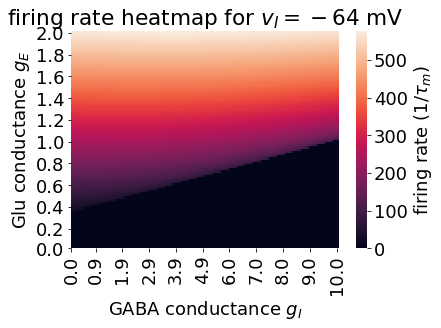

In [14]:
fig = plt.figure()


num_ticks = 11
yticks = np.linspace(0, len(ge_list) - 1, num_ticks, dtype=np.int)
yticklabels = np.array([ge_list[idx] for idx in yticks])
num_ticks = 11
xticks = np.linspace(0, len(gi_list) - 1, num_ticks, dtype=np.int)
xticklabels = np.array([gi_list[idx] for idx in xticks])


ax = sns.heatmap(firing_rate, 
                 xticklabels=np.round(xticklabels, decimals=1), 
                 yticklabels=np.round(yticklabels, decimals=1), 
                 cbar_kws={'label': r'firing rate ($1/\tau_m$)'});
ax.invert_yaxis();
ax.set_yticks(yticks)
ax.set_xticks(xticks)

plt.xlabel(r'GABA conductance $g_I$');
plt.ylabel(r'Glu conductance $g_E$');
plt.title(r'firing rate heatmap for $v_I=-64$ mV')



In [125]:
gi_list = np.linspace(0,10,100)
ge_list = np.linspace(0,2,100)

firing_rate = np.zeros((len(ge_list), len(gi_list)))

for ind1, ge in enumerate(ge_list):
    
    for ind2, gi in enumerate(gi_list):
        
        firing_rate[ind1, ind2] = frate(ge=ge, gi=gi, vi=-66)
        

Text(0.5, 1.0, 'firing rate heatmap for $v_I=-66$ mV')

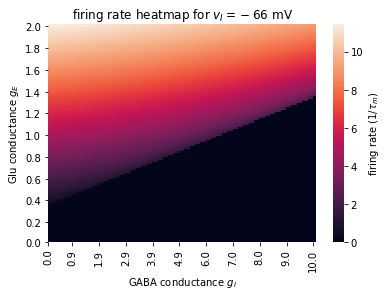

In [126]:
fig = plt.figure()


num_ticks = 11
yticks = np.linspace(0, len(ge_list) - 1, num_ticks, dtype=np.int)
yticklabels = np.array([ge_list[idx] for idx in yticks])
num_ticks = 11
xticks = np.linspace(0, len(gi_list) - 1, num_ticks, dtype=np.int)
xticklabels = np.array([gi_list[idx] for idx in xticks])


ax = sns.heatmap(firing_rate, 
                 xticklabels=np.round(xticklabels, decimals=1), 
                 yticklabels=np.round(yticklabels, decimals=1), 
                 cbar_kws={'label': r'firing rate ($1/\tau_m$)'});
ax.invert_yaxis();
ax.set_yticks(yticks)
ax.set_xticks(xticks)

plt.xlabel(r'GABA conductance $g_I$');
plt.ylabel(r'Glu conductance $g_E$');
plt.title(r'firing rate heatmap for $v_I=-66$ mV')



## calculating derivative of firing rate at ge=0

In [22]:
ge_list = np.linspace(0,1,101)
vi_list = np.linspace(-70,-56,71)

dfrate = np.zeros((len(ge_list), len(vi_list)))

for ind1,ge in enumerate(ge_list):
    
    for ind2,vi in enumerate(vi_list):
        
        frate1 = frate(ge=ge, gi=0, vi=vi)
        frate2 = frate(ge=ge, gi=0.01, vi=vi)
        dfrate[ind1, ind2] = (frate2 - frate1)/0.01
        

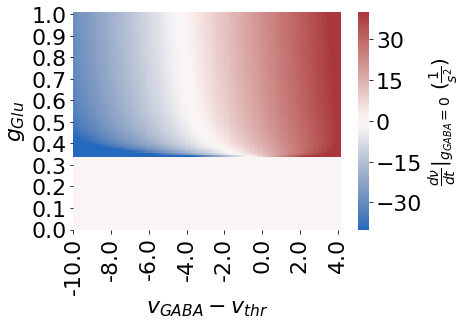

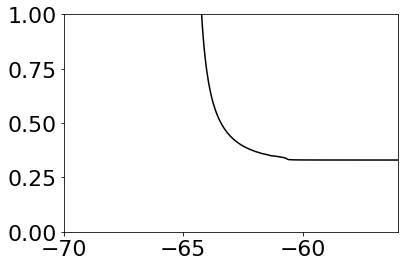

In [28]:
fig = plt.figure()


num_ticks = 11
yticks = np.linspace(0, len(ge_list) - 1, num_ticks, dtype=np.int)
yticklabels = np.array([ge_list[idx] for idx in yticks])
num_ticks = 8
xticks = np.linspace(0, len(vi_list) - 1, num_ticks, dtype=np.int)
xticklabels = np.array([vi_list[idx]-(-60) for idx in xticks])


ax = sns.heatmap(dfrate, 
                 xticklabels=np.round(xticklabels, decimals=1), 
                 yticklabels=np.round(yticklabels, decimals=2), 
                 cbar_kws={'label': r'$\frac{d\nu}{dt} |_{g_{GABA}=0}$ ($\frac{1}{s^2}$)'},
                 cmap="vlag", vmin=-40, vmax=+40);
ax.figure.axes[-1].yaxis.label.set_size(20)
ax.invert_yaxis();
ax.set_yticks(yticks)
ax.set_xticks(xticks)

plt.xlabel(r'$v_{GABA}-v_{thr}$');
plt.ylabel(r'$g_{Glu}$');
#plt.title(r'GABA effect phase diagram')

plt.savefig('phasediagram_reversal_vs_glu.png', dpi=500, transparent=True, bbox_inches='tight')

# contours
plt.figure()
levels=[0.5] # Define levels 

ct=plt.contour(vi_list,ge_list,dfrate,levels, colors='black')

plt.savefig('heatmap_contours_2.svg')